In [120]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cwd = os.getcwd()
cwd

plt.rcParams["figure.dpi"] = 200
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
SCOPE = 100

In [121]:
test = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, -2.0, np.nan),
                   (3.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, np.nan),
                   (5.0, 5.0, np.nan, 25.0),
                   (np.nan, 4.0, -9.0, np.nan),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (np.nan, 5.0, np.nan, 49.0),
                   (35.0, 5.0, -90.0, 49.0)],
                  columns=list('abcd'))
#test

In [122]:
#test.interpolate(method='linear', axis=0, limit=5, limit_direction='forward')
#test.interpolate(method='polynomial', order=2)
#test.fillna(method='ffill', inplace=True, limit=5)

In [123]:
download = f'./../../Data/5Gdataset-master/5G-production-dataset/Download/Driving/'
#download = f'/work/bde/Data/5Gdataset-master/5G-production-dataset/Netflix/Driving/Season3-StrangerThings/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    #print(file)
    df = pd.read_csv(file_dir+file)
    #print(df.info())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]#, 'Longitude', 'Latitude']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df['CellID'] = pd.to_numeric(df['CellID'])
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'])
    df['CQI'] = pd.to_numeric(df['CQI'])
    df['RSSI'] = pd.to_numeric(df['RSSI'])
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])
    df['NRxRSRP'] = pd.to_numeric(df['NRxRSRP'])
    df['NRxRSRQ'] = pd.to_numeric(df['NRxRSRQ'])

    #df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    #df.fillna(method='ffill', inplace=True)
    df = df.ffill(limit=5)
    df = df.fillna(0)

    df = df.sort_values('date')
    df = df.drop_duplicates(subset=['date'])
    #df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)
    df_list.append(df)

/tmp/ipykernel_2092546/2957828530.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', np.nan)


In [124]:
df = pd.concat(df_list, axis=0)

In [125]:
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)
#df = df.set_index('date', drop=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24446 entries, 0 to 24445
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24446 non-null  int64         
 1   CellID      24446 non-null  int64         
 2   RSRP        24446 non-null  int64         
 3   RSRQ        24446 non-null  float64       
 4   SNR         24446 non-null  float64       
 5   CQI         24446 non-null  float64       
 6   RSSI        24446 non-null  float64       
 7   DL_bitrate  24446 non-null  int64         
 8   UL_bitrate  24446 non-null  int64         
 9   NRxRSRP     24446 non-null  float64       
 10  NRxRSRQ     24446 non-null  float64       
 11  date        24446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 2.2 MB


In [126]:
# Calculate mean and standard deviation
mean_value = df['DL_bitrate'].div(1024).mean()
std_value = df['DL_bitrate'].div(1024).std()

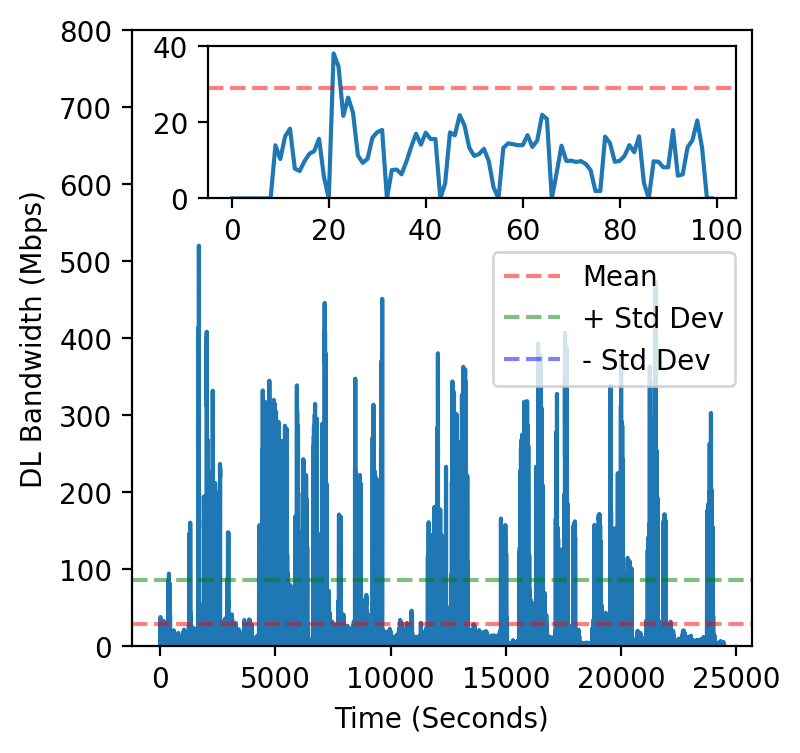

In [127]:
figure_size = (4, 4)
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('DL Bandwidth (Mbps)')
ax1.set_ylim(bottom=0, top=800)

left, bottom, width, height = [0.22, 0.67, 0.66, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_ylim(bottom=0, top=40)

ax1.plot(df['DL_bitrate'].div(1024))

alpha_val = 0.5
# Plot mean and standard deviation lines on ax1
ax1.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax1.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax1.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')

# Add legend
ax1.legend(loc='lower left', bbox_to_anchor=(0.56, 0.4))

ax2.plot(df['DL_bitrate'].div(1024)[:100])
# Plot mean and standard deviation lines on ax2
ax2.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax2.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax2.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')
fig.savefig(f'plots/Beyond5G-data.pdf', bbox_inches='tight')
plt.show()

In [ ]:
df['DL_bitrate'].div(1024).describe()

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.to_csv('data/5Gdataset/Download.csv', encoding='utf-8', index=False)
df.drop(columns=['date']).to_csv('/work/bde/Data/5Gdataset-single/Download.csv', encoding='utf-8', index=False)

In [ ]:
# Speed	   -0.101103	-0.116020	-0.079080	-0.098734
# NRxRSRQ	0.084796	-0.026925	-0.016587	0.013761
# NRxRSRP	-0.100624	-0.092604	-0.051779	-0.081669

df_limited = df.drop(columns=['NRxRSRP', 'NRxRSRQ'])
df_limited.info()

In [ ]:
df_limited.to_csv('data/5Gdataset/Download-limited.csv', encoding='utf-8', index=False)
df_limited.drop(columns=['date']).to_csv('/work/bde/Data/5Gdataset-single/Download-limited.csv', encoding='utf-8', index=False)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def multi_corr(df, feature):
    fig, ax = plt.subplots(1,3, figsize=(14, 6), dpi=300)

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

    return corr1, corr2, corr3

In [ ]:
corr1, corr2, corr3 = multi_corr(df, 'DL_bitrate')

In [ ]:
corr1['corr1'] = corr1
corr1['corr2'] = corr2
corr1['corr3'] = corr3

df_corr = corr1[['corr1', 'corr2', 'corr3']]
df_corr['average'] = df_corr.mean(axis=1)
df_corr

In [ ]:
corr1_lim, corr2_lim, corr3_lim = multi_corr(df_limited, 'DL_bitrate')

In [ ]:
corr1_lim['corr1'] = corr1_lim
corr1_lim['corr2'] = corr2_lim
corr1_lim['corr3'] = corr3_lim

df_corr_lim = corr1_lim[['corr1', 'corr2', 'corr3']]
df_corr_lim['average'] = df_corr_lim.mean(axis=1)
df_corr_lim

In [ ]:
df = df[['DL_bitrate']]
df.info()

In [ ]:
df.head()

In [ ]:
df['bandwidth'] = df[['DL_bitrate']]
tail = df[['bandwidth']]

In [ ]:
""" label_scaler = StandardScaler()
label_scaler.fit(df.values)

data = label_scaler.transform(df.values)
data = data.flatten()
print(data.shape)

tail = pd.DataFrame({'bandwidth': data})
tail.head() """

In [ ]:
span = 8
pred_len = 3

truth = []
ewma8 = []
shifted = []

tail['EWMA8'] = tail['bandwidth'].ewm(span=span, min_periods=8, adjust=True).mean()

b_truth  = tail['bandwidth'].to_numpy()
b_ewma8 = tail['EWMA8'].to_numpy()

for i in range(len(b_truth) - span - pred_len):
    truth.append(b_truth[(i+span):(i+span+pred_len)])
    ewma8.append(np.repeat(b_ewma8[i+span-1], pred_len)) #correct?
    #ewma8.append(np.repeat(b_ewma8[i+span-0], pred_len)) #informer
    shifted.append(np.repeat(b_truth[i+span-1], pred_len))

#EWMA
rmse = root_mean_squared_error(truth, ewma8)
mae = mean_absolute_error(truth, ewma8)
print(f'EWMA8 rmse: {rmse}, mae: {mae}')

#Shifted
rmse = root_mean_squared_error(truth, shifted)
mae = mean_absolute_error(truth, shifted)
print(f'Shifted rmse: {rmse}, mae: {mae}')